In [2]:
# Imports

## General
import os 
from copy import deepcopy
from itertools import product
from types import SimpleNamespace
import sys
sys.path.append("..")
from RNN_helpers import *
from IPython.display import display, Markdown

## Numerical
import numpy as np
import pandas as pd
import scipy.stats as sps
import math
from scipy.stats import linregress
import statsmodels.formula.api as smf
import statsmodels.api as sm
import  statsmodels.stats.multicomp as smmc
from sklearn.neighbors import KernelDensity

## Plotting
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sb

## Data
import csv
import pandas as pd

In [3]:
# Plotting defaults and functions

%config InlineBackend.figure_format = 'retina'

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['axes.formatter.limits'] = [-2, 3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['font.family'] = 'Arial'
plt.rc('font', family='Arial')
plt.rcParams['axes.labelpad'] = 2.0
plt.rcParams['figure.dpi'] = 200

#Setting Colors
R_COLOR = "#808080"
R_NO_STDP_COLOR = "#B3B3B3"
NNR_COLOR = '#FF767C'
NNR_NO_STDP_COLOR = "#FFBFC1"
INACTIVE_COLOR = 'silver'

PRE_STDP_COLOR = mpl.cm.Purples(2/5.)
STDP_COLOR = mpl.cm.Purples(1.)
STDP_CONTROL_COLOR = "#BA98FF"


In [4]:
def plot_summary(ax, data, i, linecolor='k', facecolor='.5', s=200, lw=2):
    median = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    q1 = np.percentile(data, 25)
    ax.plot([i,i], [q1, q3], linewidth=2, solid_capstyle='round', color=linecolor, zorder=10)
    ax.scatter(i, median, color=facecolor, edgecolor=linecolor, s=s, lw=lw, zorder=11)

# Pre-post STDP performance

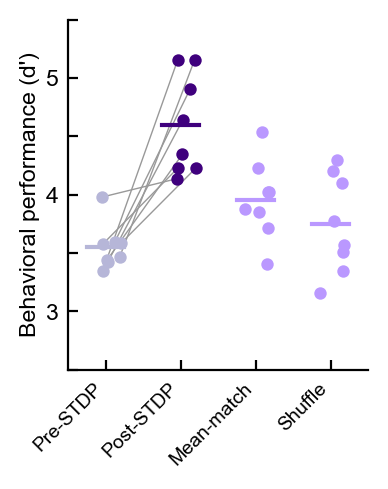

In [25]:
PLOT_NAME = "performance"
DIR1 = "../results_experiments/full dataset/results_experiment_LIFv2_gross_stdp_halftauIE_x16"
DIR2 = "../results_experiments/full dataset/results_experiment_LIFv2_STDP_controls_halftauIE"
WIDTH = .5
S = 20

perf_df1 = pd.read_csv(os.path.join(DIR1, "calculate_performance.csv"))
n_reps = np.max(perf_df1["n_rep"])
perf_df1 = perf_df1.set_index(["IE_stdp", "EE_stdp", "n_rep"])

fig = plt.figure(figsize=(2.0, 2.5))
ax = fig.add_axes([.2, .2, .75, .7])


for i in range(1, n_reps+1):
    x = (np.random.rand() - .5)*WIDTH
    ax.plot([x, x+1], [perf_df1.loc[(False, False, i)]["d_prime"], perf_df1.loc[(True, True, i)]["d_prime"]], color='.6', lw=.5, zorder=1)
    ax.scatter(x, perf_df1.loc[(False, False, i)]["d_prime"], color=PRE_STDP_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+1, perf_df1.loc[(True, True, i)]["d_prime"], color=STDP_COLOR, lw=0, zorder=2, s=S)

X1 = perf_df1.loc[(False, False)]["d_prime"].mean()
X2 = perf_df1.loc[(True, True)]["d_prime"].mean()
ax.plot([-WIDTH/2, WIDTH/2], [X1, X1], color=PRE_STDP_COLOR)
ax.plot([-WIDTH/2+1, WIDTH/2+1], [X2, X2], color=STDP_COLOR)


perf_df2 = pd.read_csv(os.path.join(DIR2, "calculate_performance.csv"))
n_reps = np.max(perf_df2["n_rep"])
perf_df2 = perf_df2.set_index(["shuffle_weights", "shuffle_method", "shuffle_sets", "n_rep"])

for i in range(1, n_reps+1):
    x = (np.random.rand() - .5)*WIDTH + 2
    ax.scatter(x, perf_df2.loc[(True, "mean", "both", i)]["d_prime"], color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+1, perf_df2.loc[(True, "all", "both", i)]["d_prime"], color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S)

X1 = perf_df2.loc[(True, "mean", "both")]["d_prime"].mean()
X2 = perf_df2.loc[(True, "all", "both")]["d_prime"].mean()
ax.plot([-WIDTH/2 + 2, WIDTH/2 + 2], [X1, X1], color=STDP_CONTROL_COLOR)
ax.plot([-WIDTH/2+1+ 2, WIDTH/2+1 + 2], [X2, X2], color=STDP_CONTROL_COLOR)


ax.set_ylim([2.5, 5.5])
ax.set_yticklabels([None, 3, None, 4, None, 5, None])
ax.set_xlim([-.5, 3.5])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Pre-STDP", "Post-STDP", "Mean-match", "Shuffle"], rotation=45, ha='right', size=7)
ax.set_ylabel("Behavioral performance (d')")

plt.savefig(os.path.join(DIR1, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR1, PLOT_NAME+".pdf"))
plt.tight_layout()

plt.savefig(os.path.join(DIR2, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, PLOT_NAME+".pdf"))
plt.tight_layout()

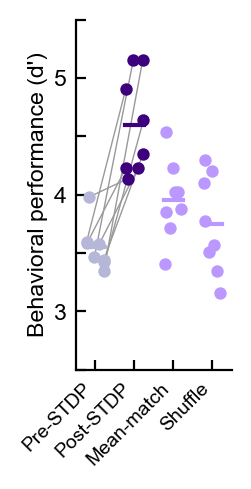

In [15]:
PLOT_NAME = "performance_thin"
DIR1 = "../results_experiments/full dataset/results_experiment_LIFv2_gross_stdp_halftauIE_x16"
DIR2 = "../results_experiments/full dataset/results_experiment_LIFv2_STDP_controls_halftauIE"
WIDTH = .5
S = 20

perf_df1 = pd.read_csv(os.path.join(DIR1, "calculate_performance.csv"))
n_reps = np.max(perf_df1["n_rep"])
perf_df1 = perf_df1.set_index(["IE_stdp", "EE_stdp", "n_rep"])

fig = plt.figure(figsize=(1.3, 2.5))
ax = fig.add_axes([.35, .2, .6, .7])

for i in range(1, n_reps+1):
    x = (np.random.rand() - .5)*WIDTH
    ax.plot([x, x+1], [perf_df1.loc[(False, False, i)]["d_prime"], perf_df1.loc[(True, True, i)]["d_prime"]], color='.6', lw=.5, zorder=1)
    ax.scatter(x, perf_df1.loc[(False, False, i)]["d_prime"], color=PRE_STDP_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+1, perf_df1.loc[(True, True, i)]["d_prime"], color=STDP_COLOR, lw=0, zorder=2, s=S)

X1 = perf_df1.loc[(False, False)]["d_prime"].mean()
X2 = perf_df1.loc[(True, True)]["d_prime"].mean()
ax.plot([-WIDTH/2, WIDTH/2], [X1, X1], color=PRE_STDP_COLOR)
ax.plot([-WIDTH/2+1, WIDTH/2+1], [X2, X2], color=STDP_COLOR)


perf_df2 = pd.read_csv(os.path.join(DIR2, "calculate_performance.csv"))
n_reps = np.max(perf_df2["n_rep"])
perf_df2 = perf_df2.set_index(["shuffle_weights", "shuffle_method", "shuffle_sets", "n_rep"])

for i in range(1, n_reps+1):
    x = (np.random.rand() - .5)*WIDTH + 2
    ax.scatter(x, perf_df2.loc[(True, "mean", "both", i)]["d_prime"], color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+1, perf_df2.loc[(True, "all", "both", i)]["d_prime"], color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S)

X1 = perf_df2.loc[(True, "mean", "both")]["d_prime"].mean()
X2 = perf_df2.loc[(True, "all", "both")]["d_prime"].mean()
ax.plot([-WIDTH/2 + 2, WIDTH/2 + 2], [X1, X1], color=STDP_CONTROL_COLOR)
ax.plot([-WIDTH/2+1+ 2, WIDTH/2+1 + 2], [X2, X2], color=STDP_CONTROL_COLOR)


ax.set_ylim([2.5, 5.5])
ax.set_yticklabels([None, 3, None, 4, None, 5, None])
ax.set_xlim([-.5, 3.5])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Pre-STDP", "Post-STDP", "Mean-match", "Shuffle"], rotation=45, ha='right', size=7)
ax.set_ylabel("Behavioral performance (d')")

plt.savefig(os.path.join(DIR1, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR1, PLOT_NAME+".pdf"))
plt.tight_layout()

plt.savefig(os.path.join(DIR2, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, PLOT_NAME+".pdf"))
plt.tight_layout()

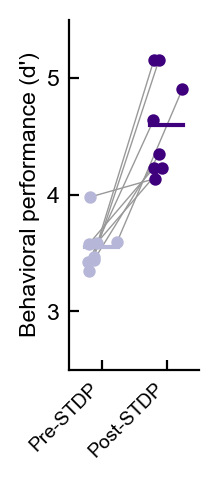

In [16]:
PLOT_NAME = "performance_small"
DIR1 = "../results_experiments/full dataset/results_experiment_LIFv2_gross_stdp_halftauIE_x16"
DIR2 = "../results_experiments/full dataset/results_experiment_LIFv2_STDP_controls_halftauIE"
WIDTH = .5
S = 20

perf_df1 = pd.read_csv(os.path.join(DIR1, "calculate_performance.csv"))
n_reps = np.max(perf_df1["n_rep"])
perf_df1 = perf_df1.set_index(["IE_stdp", "EE_stdp", "n_rep"])

fig = plt.figure(figsize=(1.0, 2.5))
ax = fig.add_axes([.3, .2, .65, .7])


for i in range(1, n_reps+1):
    x = (np.random.rand() - .5)*WIDTH
    ax.plot([x, x+1], [perf_df1.loc[(False, False, i)]["d_prime"], perf_df1.loc[(True, True, i)]["d_prime"]], color='.6', lw=.5, zorder=1)
    ax.scatter(x, perf_df1.loc[(False, False, i)]["d_prime"], color=PRE_STDP_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+1, perf_df1.loc[(True, True, i)]["d_prime"], color=STDP_COLOR, lw=0, zorder=2, s=S)

X1 = perf_df1.loc[(False, False)]["d_prime"].mean()
X2 = perf_df1.loc[(True, True)]["d_prime"].mean()
ax.plot([-WIDTH/2, WIDTH/2], [X1, X1], color=PRE_STDP_COLOR)
ax.plot([-WIDTH/2+1, WIDTH/2+1], [X2, X2], color=STDP_COLOR)


perf_df2 = pd.read_csv(os.path.join(DIR2, "calculate_performance.csv"))
n_reps = np.max(perf_df2["n_rep"])
perf_df2 = perf_df2.set_index(["shuffle_weights", "shuffle_method", "shuffle_sets", "n_rep"])

# for i in range(1, n_reps+1):
#     x = (np.random.rand() - .5)*WIDTH + 2
#     ax.scatter(x, perf_df2.loc[(True, "mean", "both", i)]["d_prime"], color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S) 
#     ax.scatter(x+1, perf_df2.loc[(True, "all", "both", i)]["d_prime"], color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S)

# X1 = perf_df2.loc[(True, "mean", "both")]["d_prime"].mean()
# X2 = perf_df2.loc[(True, "all", "both")]["d_prime"].mean()
# ax.plot([-WIDTH/2 + 2, WIDTH/2 + 2], [X1, X1], color=STDP_CONTROL_COLOR)
# ax.plot([-WIDTH/2+1+ 2, WIDTH/2+1 + 2], [X2, X2], color=STDP_CONTROL_COLOR)


ax.set_ylim([2.5, 5.5])
ax.set_xlim([-.5, 1.5])
ax.set_xticks([0,1])
ax.set_yticks([3,4,5])
ax.set_xticklabels(["Pre-STDP", "Post-STDP"], rotation=45, ha='right', size=7)
ax.set_ylabel("Behavioral performance (d')")

plt.savefig(os.path.join(DIR1, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR1, PLOT_NAME+".pdf"))
plt.tight_layout()

plt.savefig(os.path.join(DIR2, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, PLOT_NAME+".pdf"))
plt.tight_layout()

In [33]:
N_comp = 3

X1 = perf_df1.loc[(False, False)]["d_prime"]
X2 = perf_df1.loc[(True, True)]["d_prime"]
print(sps.mannwhitneyu(X1, X2).pvalue * 3)

X3 = perf_df2.loc[(True, "mean", "both")]["d_prime"]
X4 = perf_df2.loc[(True, "all", "both")]["d_prime"]
print(sps.mannwhitneyu(X2, X4).pvalue * 3)
print(sps.mannwhitneyu(X2, X3).pvalue * 3)

0.0014086585486757848
0.005814062173492125
0.011108300010750402


In [36]:
stat = np.median

m_1 = stat(X1)
for name, data in [("post", X2), ("mean", X3), ("shuffle", X4)]:
    m = stat(data)
    print(f"pre: {m_1:.2f}, {name}: {m:.2f}, Delta: {m - m_1:.2f}")
    print(sps.mannwhitneyu(X1, data).pvalue * 3)


pre: 3.52, post: 4.49, Delta: 0.97
0.0014086585486757848
pre: 3.52, mean: 3.95, Delta: 0.43
0.03592301231963915
pre: 3.52, shuffle: 3.67, Delta: 0.15
0.742254807169646


In [31]:
data = perf_df1.loc[(True, True)]["d_prime"]

sps.wilcoxon(data)

WilcoxonResult(statistic=0.0, pvalue=0.0078125)

# Pre-post STDP statistics 

### Number of inactive cells

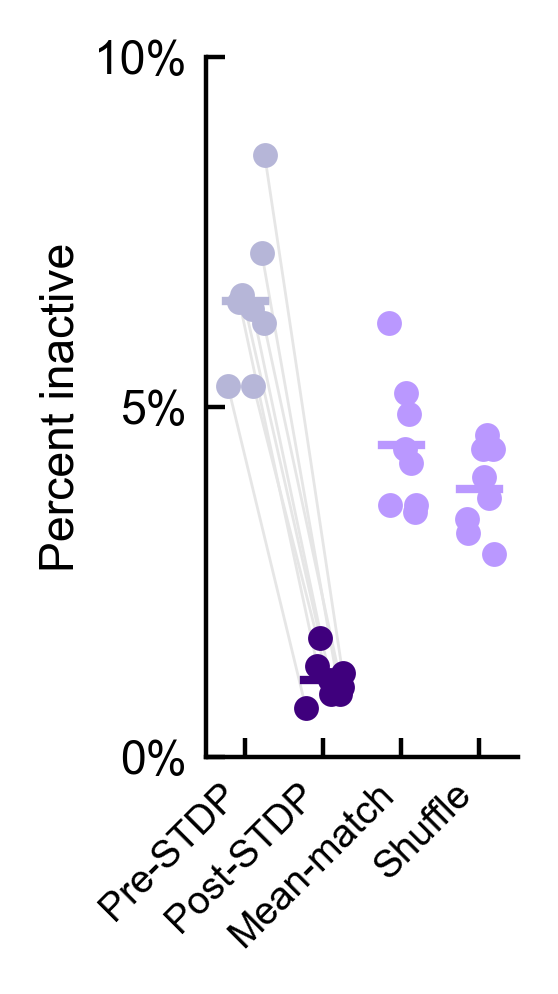

In [51]:
PLOT_NAME = "inactive_shift"
DIR = "../results_experiments/full dataset/results_experiment_LIFv2_gross_stdp_halftauIE_x16"
DIR2 = "../results_experiments/full dataset/results_experiment_LIFv2_STDP_controls_halftauIE"
WIDTH = .5
S = 20

resp_df = pd.read_csv(os.path.join(DIR, "test_responsiveness.csv"))
n_reps = np.max(resp_df["n_rep"])
resp_df = resp_df.set_index(["IE_stdp", "EE_stdp", "n_rep"])

fig = plt.figure(figsize=(1.3, 2.5))
ax = fig.add_axes([.35, .2, .6, .7])

INAC1s = []
INAC2s = []
for i in range(1, n_reps+1):
    INAC1, _ = count_inactive(resp_df.loc[(False, False, i), "run"], DIR)
    NCR1 = resp_df.loc[(False, False, i), "non"] - INAC
    R1 = 1000 - NCR - INAC
    INAC1s.append(INAC1/1000)


    INAC2, _ = count_inactive(resp_df.loc[(True, True, i), "run"], DIR)
    NCR2 = resp_df.loc[(True, True, i), "non"] - INAC
    R2 = 1000 - NCR - INAC
    INAC2s.append(INAC2/1000)

    x = (np.random.rand() - .5)*WIDTH
    ax.plot([x, x+1], [INAC1 /1000, INAC2/1000], color='.9', lw=.5, zorder=1)
    ax.scatter(x, INAC1/1000, color=PRE_STDP_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+1, INAC2/1000, color=STDP_COLOR, lw=0, zorder=2, s=S)

X1 = np.mean(INAC1s)
X2 = np.mean(INAC2s)
ax.plot([-WIDTH/2, WIDTH/2], [X1, X1], color=PRE_STDP_COLOR)
ax.plot([-WIDTH/2+1, WIDTH/2+1], [X2, X2], color=STDP_COLOR)



resp_df2 = pd.read_csv(os.path.join(DIR2, "test_responsiveness.csv"))
n_reps = np.max(resp_df2["n_rep"])
resp_df2 = resp_df2.set_index(["shuffle_weights", "shuffle_method", "shuffle_sets", "n_rep"])

INAC3s = []
INAC4s = []
for i in range(1, n_reps+1):
    INAC1, _ = count_inactive(resp_df2.loc[(True, "mean", "both", i), "run"], DIR2)
    NCR1 = resp_df2.loc[(True, "mean", "both", i), "non"] - INAC
    R1 = 1000 - NCR - INAC
    INAC3s.append(INAC1/1000)


    INAC2, _ = count_inactive(resp_df2.loc[(True, "all", "both", i), "run"], DIR2)
    NCR2 = resp_df2.loc[(True, "all", "both", i), "non"] - INAC
    R2 = 1000 - NCR - INAC
    INAC4s.append(INAC2/1000)

    x = (np.random.rand() - .5)*WIDTH
    ax.scatter(x+2, INAC1/1000, color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S) 
    ax.scatter(x+3, INAC2/1000, color=STDP_CONTROL_COLOR, lw=0, zorder=2, s=S)

X1 = np.mean(INAC3s)
X2 = np.mean(INAC4s)
ax.plot([-WIDTH/2 +2, WIDTH/2 +2], [X1, X1], color=STDP_CONTROL_COLOR)
ax.plot([-WIDTH/2+3, WIDTH/2+3], [X2, X2], color=STDP_CONTROL_COLOR)


ax.set_yticks(np.arange(0, .25, .05))
ax.set_yticklabels([f"{i:.0%}" for i in np.arange(0, .25, .05)])
ax.set_ylim([0, .1])
ax.set_xlim([-.5, 3.5])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Pre-STDP", "Post-STDP", "Mean-match", "Shuffle"], rotation=45, ha='right', size=7)
ax.set_ylabel("Percent inactive")

plt.savefig(os.path.join(DIR, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR, PLOT_NAME+".pdf"))
plt.tight_layout()

plt.savefig(os.path.join(DIR2, PLOT_NAME+"_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, PLOT_NAME+".pdf"))
plt.tight_layout()

In [25]:
N_comp = 3

X1 = INAC1s
X2 = INAC2s
print(sps.mannwhitneyu(X1, X2).pvalue * 3)

X3 = INAC3s
X4 = INAC4s
print(sps.mannwhitneyu(X2, X4).pvalue * 3)
print(sps.mannwhitneyu(X2, X3).pvalue * 3)

0.0013843295691817698
0.0013843295691817698
0.0013843295691817698


### Distributions

In [5]:
EXP_NAME = "controls"
DIR = "../results_experiments/full dataset/results_experiment_LIFv2_gross_stdp_halftauIE_x16"
DIR2 = "../results_experiments/full dataset/results_experiment_LIFv2_STDP_controls_halftauIE"
N1 = 1
N2 = 1001

# Color scheme
COLORS = [PRE_STDP_COLOR, STDP_COLOR, STDP_CONTROL_COLOR, STDP_CONTROL_COLOR]
LINE_STYLES = ['-', '-', ':', '-']

s = {}
c = {}
r = {}
d = {}
labels = []

df = pd.read_csv(os.path.join(DIR, "calculate_responsiveness.csv"), index_col=0)

for EE_stdp, IE_stdp in [(False, False), (True, True)]:
    if (IE_stdp, EE_stdp) == (False, False):
        label = "Pre-STDP"
    elif (IE_stdp, EE_stdp) == (True, True):
        label = "Post-STDP"
    s[label] = []
    c[label] = []
    r[label] = []
    d[label] = 0
    c_df = df[(df["IE_stdp"] == IE_stdp) & (df["EE_stdp"] == EE_stdp)]
    for row in c_df.iterrows():
        for j in range(N1, N2):
            try:
                resp = eval(row[1][j])
                # if resp['fr_mean'] < 3.3:
                #     d[label] += 1
                # else:
                s[label].append(resp["s_mean"])
                c[label].append(resp["c_mean"])
                r[label].append(resp["responsiveness"])
            except:
                continue

df = pd.read_csv(os.path.join(DIR2, "calculate_responsiveness.csv"), index_col=0)

for method in ['mean', 'all']:
    if method == 'all':
        label = "Shuffle"
    elif method == 'mean':
        label = "Mean-matched"
    s[label] = []
    c[label] = []
    r[label] = []
    d[label] = 0
    c_df = df[(df["shuffle_method"] == method) & (df["shuffle_sets"] == "both")]
    for row in c_df.iterrows():
        for j in range(N1, N2):
            try:
                resp = eval(row[1][j])
                # if resp['fr_mean'] < 3.3:
                #     d[label] += 1
                # else:
                s[label].append(resp["s_mean"])
                c[label].append(resp["c_mean"])
                r[label].append(resp["responsiveness"])
            except:
                continue

LINE_STYLES = LINE_STYLES[::-1]
COLORS = COLORS[::-1]
s = dict(reversed(list(s.items())))
c = dict(reversed(list(c.items())))
r = dict(reversed(list(r.items())))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


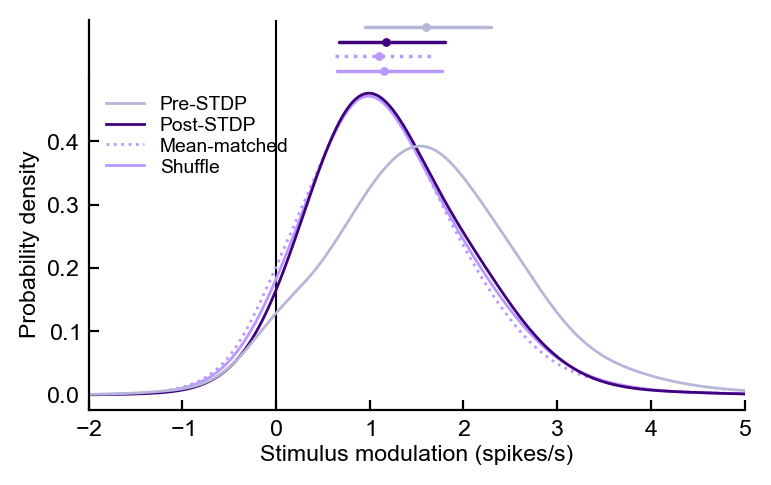

In [6]:
PLOT_NAME = "_stimulus_responsiveness"
XLABEL = "Stimulus modulation (spikes/s)"


fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4,2.5), show_dead=False)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (p, data) in enumerate(s.items()):
    plot_pdf_and_summary(data, i, ax_d, ax_s, color=COLORS[i], lim=(-2, 5), label=p, n_dead=d[p], ax_dead=None, linestyle=LINE_STYLES[i])
handles, labels = ax_d.get_legend_handles_labels()  
l = ax_d.legend(handles[::-1], labels[::-1], loc='upper left', labelspacing=.15, fontsize="x-small")
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)

# add_summary_sig((0,3), 2.5, "***", ax_s)
# add_summary_sig((0,1), 2.5, "", ax_s)
# add_summary_sig((1,2), 2.5, "", ax_s)
# add_summary_sig((2,3), 2.5, "", ax_s)

plt.savefig(os.path.join(DIR2, EXP_NAME + PLOT_NAME + "_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, EXP_NAME + PLOT_NAME + ".pdf"), dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


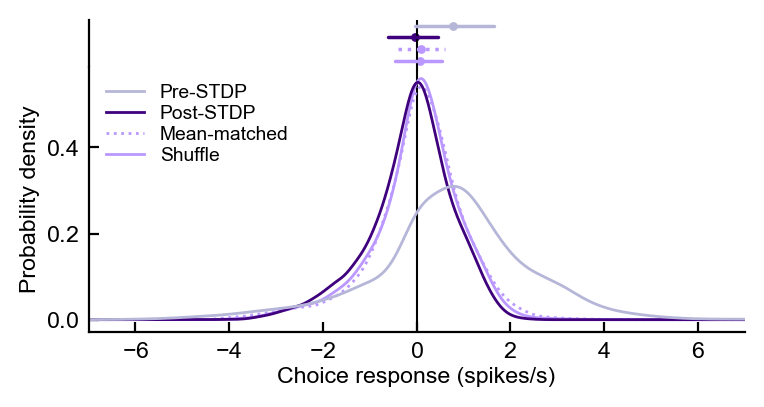

In [7]:
PLOT_NAME = "_choice_responsiveness"
XLABEL = "Choice response (spikes/s)"

fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(4,2), show_dead=False)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (p, data) in enumerate(c.items()):
    plot_pdf_and_summary(data, i, ax_d, ax_s, color=COLORS[i], lim=(-7, 7), label=p, n_dead=d[p], ax_dead=None, linestyle=LINE_STYLES[i])
handles, labels = ax_d.get_legend_handles_labels()  
l = ax_d.legend(handles[::-1], labels[::-1], loc='upper left', labelspacing=.15, fontsize="x-small")
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)

#add_summary_sig((0,3), 4.0, "***", ax_s)
#add_summary_sig((0,2), 3.0, "***", ax_s)

plt.savefig(os.path.join(DIR2, EXP_NAME + PLOT_NAME + "_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, EXP_NAME + PLOT_NAME + ".pdf"), dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


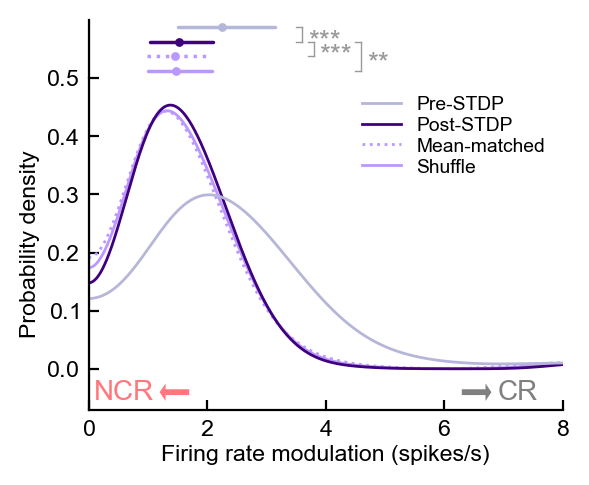

In [8]:
PLOT_NAME = "_responsiveness"
XLABEL = "Firing rate modulation (spikes/s)"

fig, ax_d, ax_s = create_distribution_summary_figure(figsize=(3, 2.5), show_dead=False, left=.15)
add_reference_line(ax_d, 0)
add_reference_line(ax_s, 0)
for i, (p, data) in enumerate(r.items()):
    plot_pdf_and_summary(data, i, ax_d, ax_s, color=COLORS[i], end_domain=0, lim=(0, 8), label=p, lw=1, linestyle=LINE_STYLES[i])
handles, labels = ax_d.get_legend_handles_labels()  
l = ax_d.legend(handles[::-1], labels[::-1], loc='upper right', labelspacing=.15, fontsize="x-small")
#l.set_title(PARAM_NAME)
ax_d.set_xlabel(XLABEL)
ax_d.set_ylim([0, .5])
add_NCR_CR_scale(ax_d, hoffset=1.1, height=.07, voffset=0.03)
add_summary_sig((2,3), 3.6, "***", ax_s)
add_summary_sig((1,2), 3.8, "***", ax_s)
add_summary_sig((0,2), 4.6, "**", ax_s)
# add_summary_sig((0,1), 2.5, "", ax_s)
# add_summary_sig((1,2), 2.5, "", ax_s)
# add_summary_sig((2,3), 2.5, "", ax_s)

plt.savefig(os.path.join(DIR2, EXP_NAME + PLOT_NAME + "_300.png"), dpi=300)
plt.savefig(os.path.join(DIR2, EXP_NAME + PLOT_NAME + ".pdf"), dpi=300)

In [13]:
for comparison in ["Pre-STDP", "Mean-matched", "Shuffle"]:
    d1 = r["Post-STDP"]
    d2 = r[comparison]
    print(comparison)
    print(sps.stats.kstest(d1, d2))
    print(sps.stats.mannwhitneyu(d1, d2))
    m_d1 = np.median(d1)
    m_d2 = np.median(d2)
    print(f"Median Post-STDP: {m_d1:.3}, Median {comparison}: {m_d2:.3}, Delta = {m_d1 - m_d2:.3}")

Pre-STDP
KstestResult(statistic=0.3047738693467337, pvalue=1e-323)
MannwhitneyuResult(statistic=19721187.5, pvalue=0.0)
Median Post-STDP: 1.52, Median Pre-STDP: 2.25, Delta = -0.725
Mean-matched
KstestResult(statistic=0.038529164939385054, pvalue=1.4265910698085804e-05)
MannwhitneyuResult(statistic=30383430.0, pvalue=6.266707441553345e-06)
Median Post-STDP: 1.52, Median Mean-matched: 1.46, Delta = 0.0678
Shuffle
KstestResult(statistic=0.02689687117680961, pvalue=0.0009105908898656609)
MannwhitneyuResult(statistic=61831272.0, pvalue=0.0017334890987172355)
Median Post-STDP: 1.52, Median Shuffle: 1.48, Delta = 0.0473
